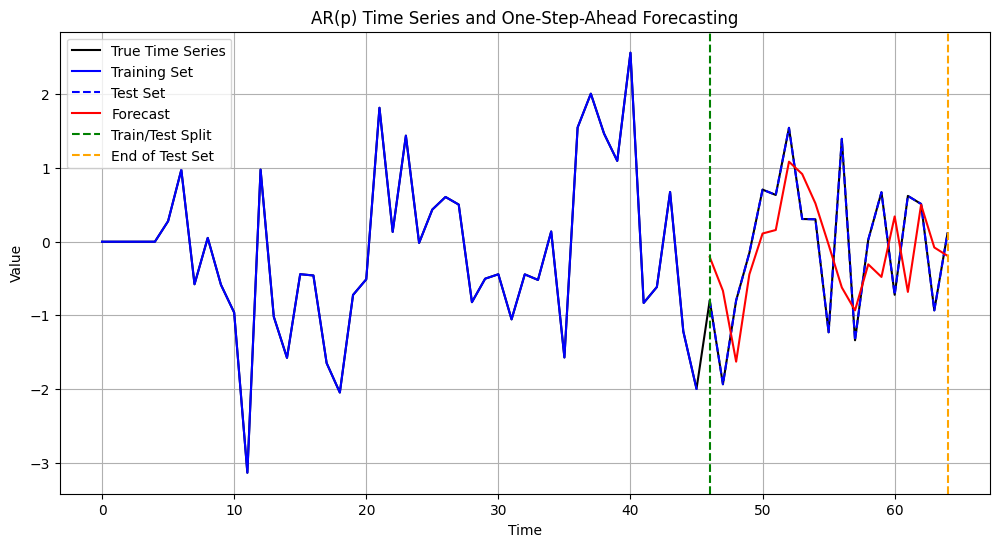

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 65
n_train = np.round(n*0.7).astype(int)
n_test = n - n_train
p = 5  # Order of the AR model

# Automatically generate coefficients for the AR(p) model
coeffs = np.random.uniform(-0.5, 0.5, p)

# Create a synthetic AR(p) time series
n_total = n_train + n_test
series = np.zeros(n_total)
noise_std = 1.0
for t in range(p, n_total):
    series[t] = np.dot(coeffs, series[t-p:t][::-1]) + np.random.normal(0, noise_std)

# Split into training and test sets
train_series = series[:n_train]
test_series = series[n_train:]

# Fit the AR model on the training set
ar_model = AutoReg(train_series, lags=p)
ar_model_fit = ar_model.fit()

# One-step-ahead forecasting for the test set
forecasts = []
history = list(train_series)

for t in range(len(test_series)):
    end = n_train + t
    ar_model = AutoReg(series[:end], lags=p)
    ar_model_fit = ar_model.fit()
    forecast = ar_model_fit.predict(start=end, end=end)
    forecasts.append(forecast[0])  # Access the first element directly

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the entire time series
plt.plot(series, label='True Time Series', color='black')

# Plot the training and test forecasts
plt.plot(range(n_train), train_series, label='Training Set', color='blue')
plt.plot(range(n_train, n_total), test_series, label='Test Set', color='blue', linestyle='dashed')
plt.plot(range(n_train, n_total), forecasts, label='Forecast', color='red')

# Add vertical lines for the start and end of the train and test sets
plt.axvline(x=n_train, color='green', linestyle='--', label='Train/Test Split')
plt.axvline(x=n_total-1, color='orange', linestyle='--', label='End of Test Set')

# Add titles and labels
plt.title('AR(p) Time Series and One-Step-Ahead Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


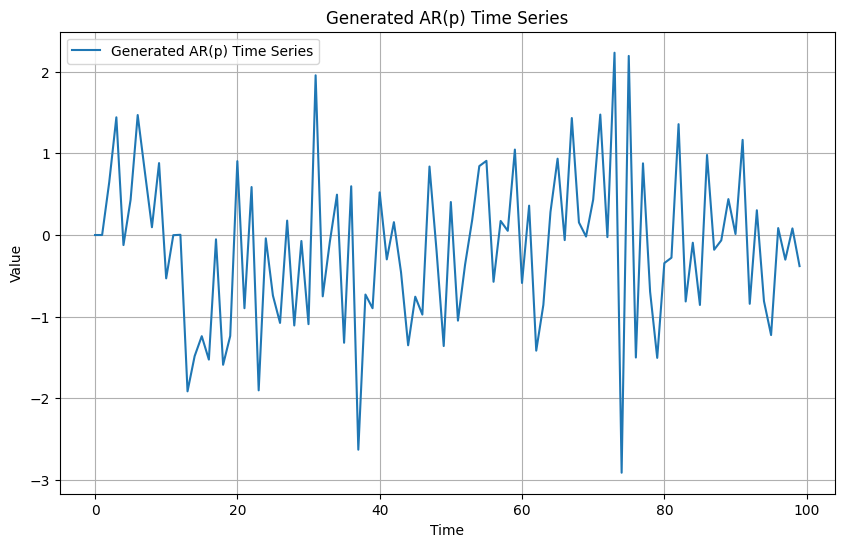

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=273.535, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=283.639, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=283.473, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=284.420, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=271.169, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=271.429, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=280.804, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=273.157, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=271.884, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=271.537, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=273.767, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=270.932, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=271.558, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=279.239, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=271.6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima

# Set seed for reproducibility
np.random.seed(42)

# Parameters for AR(p) model
n_samples = 100
p = 2  # Order of the AR model
coeffs = np.random.uniform(-0.5, 0.5, p) # Generate coefficients for the AR(p) model

noise_std = 1.0  # Standard deviation of the noise

# Generate AR(p) time series
ar_series = np.zeros(n_samples)
for t in range(p, n_samples):
    ar_series[t] = np.dot(coeffs, ar_series[t-p:t][::-1]) + np.random.normal(0, noise_std)

# Plot the generated AR(p) time series
plt.figure(figsize=(10, 6))
plt.plot(ar_series, label='Generated AR(p) Time Series')
plt.title('Generated AR(p) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Fit Auto-ARIMA model to the generated time series
auto_arima_model = auto_arima(ar_series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the Auto-ARIMA model
print(auto_arima_model.summary())

# Extract the estimated p, d, q values from the Auto-ARIMA model
estimated_p = auto_arima_model.order[0]
estimated_d = auto_arima_model.order[1]
estimated_q = auto_arima_model.order[2]

# Print a message telling if the estimated ARIMA(p,d,q) model is the same as the AR(p) generated
if estimated_p == p and estimated_d == 0 and estimated_q == 0:
    print(f"The estimated ARIMA({estimated_p},{estimated_d},{estimated_q}) model is the same as the AR({p}) model that generated the series.")
else:
    print(f"The estimated ARIMA({estimated_p},{estimated_d},{estimated_q}) model is NOT the same as the AR({p}) model that generated the series.")



Using AIC as information criterion:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1176.321, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1303.368, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1297.993, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1301.690, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1192.033, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1187.736, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1177.841, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1145.904, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1172.059, Time=0.19 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1144.428, Time=0.25 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=1142.783, Time=0.21 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1156.540, Time=0.39 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=1139.991, Time=0.34 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1138.061, Time=0.25 

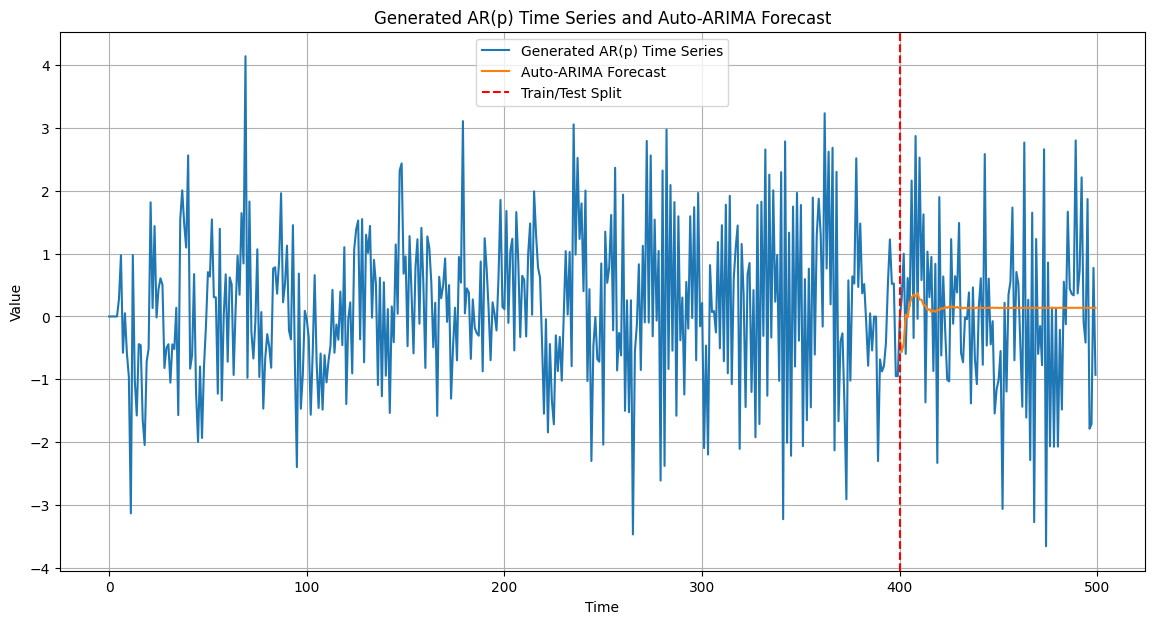

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# Set seed for reproducibility
np.random.seed(42)

# Parameters for AR(p) model
n_samples = 500
p = 5  # Order of the AR model
coeffs = np.random.uniform(-0.5, 0.5, p) # Generate coefficients for the AR(p) model
noise_std = 1.0  # Standard deviation of the noise

# Generate AR(p) time series
ar_series = np.zeros(n_samples)
for t in range(p, n_samples):
    ar_series[t] = np.dot(coeffs, ar_series[t-p:t][::-1]) + np.random.normal(0, noise_std)

# Split data into train and test sets
train_size = int(len(ar_series) * 0.8)
train, test = ar_series[:train_size], ar_series[train_size:]

# Fit Auto-ARIMA model to the training data using AIC, AICc, and BIC
# criteria = ['aic', 'aicc', 'bic']
criteria = ['aic']
results = []

for criterion in criteria:
    print(f"\nUsing {criterion.upper()} as information criterion:")
    model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, information_criterion=criterion)
    
    # Forecast the test set
    forecast = model.predict(n_periods=len(test))
    
    # Calculate evaluation metrics for training and test sets
    train_forecast = model.predict_in_sample()
    rmse_train = np.sqrt(mean_squared_error(train, train_forecast))
    rmse_test = np.sqrt(mean_squared_error(test, forecast))
    
    results.append({
        'criterion': criterion,
        'order': model.order,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test
    })
    
    print(f"Model: ARIMA{model.order}")
    print(f"RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}")

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("\nRMSE for all models:")
print(results_df)

# Find the best model based on RMSE for the test set
best_model_info = results_df.loc[results_df['rmse_test'].idxmin()]
best_model_criterion = best_model_info['criterion']
best_model_order = best_model_info['order']

# Fit the best model again for summary and plotting
best_model = auto_arima(train, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True, stepwise=True, information_criterion=best_model_criterion)

# Print the best model summary
print(f"\nBest model based on RMSE Test: ARIMA{best_model_order} using {best_model_criterion.upper()}")
print(best_model.summary())

# Forecast the test set using the best model
best_forecast = best_model.predict(n_periods=len(test))

# Plot the generated AR(p) time series and forecasts
plt.figure(figsize=(14, 7))
plt.plot(ar_series, label='Generated AR(p) Time Series')
plt.plot(np.arange(train_size, train_size + len(test)), best_forecast, label='Auto-ARIMA Forecast')
plt.axvline(x=train_size, color='r', linestyle='--', label='Train/Test Split')
plt.title('Generated AR(p) Time Series and Auto-ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
